# Simple Linear Regression Implementation

Goal: Getting to know the tensorflow library by implementing a couple of case studies with popular model families

Learning: [to be filled]

Started: 2017-05-12
Ended: [work in progress]

In [1]:
# Starting basic imports
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation

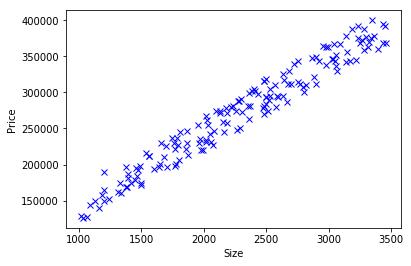

In [2]:
# Defining the session Instance
sess = tf.Session()

# Creating dummy dataset
num_house = 160
np.random.seed(42)
house_size = np.random.randint(low=1000, high=3500, size=num_house )

np.random.seed(42)
house_price = house_size * 100.0 + np.random.randint(low=20000, high=70000, size=num_house )

# Plot generated house and size
plt.plot(house_size, house_price, 'bx')
plt.ylabel('Price')
plt.xlabel('Size')
plt.show()

Define a helper function to z-scale the data

In [6]:
# normalize the data values to prevent over and underflow
def normalize(array):
    return (array - array.mean() )/ array.std()

In [3]:
# define the number of training samples for train test split
num_train_samples = math.floor(num_house * 0.7)

# define training data
train_house_size = np.asarray(house_size[:num_train_samples])
train_price = np.asarray(house_price[:num_train_samples])

train_house_size_norm = normalize(train_house_size)
train_price_norm = normalize(train_price)

# define test data
test_house_size = np.asarray(house_size[num_train_samples:])
test_price = np.asarray(house_price[num_train_samples:])

test_house_size_norm = normalize(test_house_size)
test_price_norm = normalize(test_price)

Applying the normalization we constrain the data to a normal distribution with mean 0

In [12]:
for func in (np.mean, np.std):
    for data in (train_house_size, train_price, 
                 train_house_size_norm, train_price_norm):
        print(func.__name__, "=", func(data))

mean = 2301.94642857
mean = 272221.848214
mean = 1.80411241502e-16
mean = -3.23154201811e-16
std = 712.062658249
std = 74624.907908
std = 1.0
std = 1.0


Next we define the Tensor Containers to be used during Model Training

In [13]:
# Place values in Tensor Containers
# those will get updated as we call on gradient descent
tf_house_size = tf.placeholder('float', name='house_size')
tf_price = tf.placeholder('float', name='price')

# Define the variable sholding the size and price factor we set during training
# Initializing them to random variables based on the normal distribution
tf_size_factor = tf.Variable(np.random.randn(), name='size_factor')
tf_price_offset = tf.Variable(np.random.randn(), name='price_offset')

Now the Operations are chained to create the Computational Graph

In [14]:
# 2. Define thfe operation 
tf_price_pred = tf.add(tf.multiply(tf_size_factor, tf_house_size), tf_price_offset)

# Calculate the loss function
tf_cost = tf.reduce_sum(tf.pow(tf_price_pred - tf_price, 2))/(2*num_train_samples)

# Optimize learning rate
learning_rate = 0.1

# 4. define a Gradient descent optimizer that will minimize the loss of the 'cost' function
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(tf_cost)

# Initializingg the variables
init = tf.global_variables_initializer()

After Variables have been initialized the Session can be called

iteration #: 0002 cost= 1.326728225 size_factor -0.161558 price_offset= -1.14493
iteration #: 0004 cost= 0.895426214 size_factor 0.0456974 price_offset= -0.937167
iteration #: 0006 cost= 0.606481671 size_factor 0.21534 price_offset= -0.767093
iteration #: 0008 cost= 0.412913084 size_factor 0.354196 price_offset= -0.627871
iteration #: 0010 cost= 0.283243448 size_factor 0.467853 price_offset= -0.513905
iteration #: 0012 cost= 0.196383253 size_factor 0.560883 price_offset= -0.420614
iteration #: 0014 cost= 0.138202921 size_factor 0.63703 price_offset= -0.344246
iteration #: 0016 cost= 0.099235289 size_factor 0.699358 price_offset= -0.281733
iteration #: 0018 cost= 0.073138170 size_factor 0.750375 price_offset= -0.230559
iteration #: 0020 cost= 0.055662543 size_factor 0.792133 price_offset= -0.188669
iteration #: 0022 cost= 0.043961693 size_factor 0.826313 price_offset= -0.154378
iteration #: 0024 cost= 0.036128599 size_factor 0.85429 price_offset= -0.126308
iteration #: 0026 cost= 0.0308

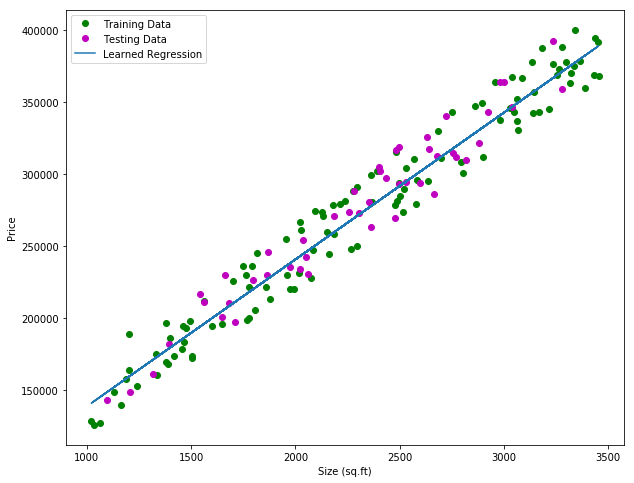

In [15]:
with tf.Session() as sess:
    sess.run(init)

    # Define how often to display training progress and number of training iterations
    display_every = 2
    num_training_iter = 50
    
    #Calculate the number of lines to animate
    fit_num_plots = math.floor(num_training_iter/display_every)
    # add storage of factor and offset values from each epoch
    fit_size_factor = np.zeros(fit_num_plots)
    fit_price_offsets = np.zeros(fit_num_plots)
    
    # keep iterating over the training data
    for iteration in range(num_training_iter):

        #  Fit all training data
        for (x,y) in zip(train_house_size_norm, train_price_norm):
            sess.run(optimizer, feed_dict={tf_house_size:x, tf_price: y})

        
        # Display current status
        if (iteration + 1) % display_every == 0:
            c = sess.run(tf_cost, feed_dict={tf_house_size: train_house_size_norm, tf_price: train_price_norm})
            print('iteration #:', '%04d' % (iteration + 1), 'cost=', '{:.9f}'.format(c), \
            "size_factor", sess.run(tf_size_factor), "price_offset=", sess.run(tf_price_offset))

    print("Optimization Finished!")
    training_cost = sess.run(tf_cost, feed_dict={tf_house_size: train_house_size_norm, tf_price: train_price_norm})
    print("Trained cost=", training_cost, "size_factor=", sess.run(tf_size_factor), "price_offset=", sess.run(tf_price_offset))

    train_house_size_std = train_house_size.std()
    train_house_size_mean = train_house_size.mean()

    train_price_std = train_price.std()
    train_price_mean = train_price.mean()

    # Plot the graph
    plt.rcParams["figure.figsize"] = (10,8)
    plt.figure()
    plt.ylabel("Price")
    plt.xlabel("Size (sq.ft)")
    plt.plot(train_house_size, train_price, 'go', label='Training Data')
    plt.plot(test_house_size, test_price, 'mo', label='Testing Data')
    plt.plot(train_house_size_norm * train_house_size_std + train_house_size_mean,
            (sess.run(tf_size_factor) * train_house_size_norm  + sess.run(tf_price_offset)) * train_price_std  + train_price_mean,
            label='Learned Regression')

    plt.legend(loc='upper left')
    plt.show()